# COMP 4447 Final Project
- [Github Link](https://github.com/jimmyyih518/TOOLS1_FINAL_PROJECT)
- Project Team: Max and Jimmy
- Winter 2023

#### Table of Contents
- [Project Description](#Dataset-and-Motivation)
- [Section 1: Data Collection](#Section-1---Data-Collection)
- [Section 2: Data Cleanup](#Section-2---Data-Cleanup)
- [Section 3: Data Visualizations](#Section-3---Data-Visualization)
- [Section 4: Data Analysis](#Section-4---Analysis-Insights-and-Conclusions)
- [Conclusion: Conclusions](#Conclusions)

## Dataset and Motivation

The ongoing housing crisis in multiple prominent cities throughout North America has been a major motivation behind our selection of real estate data for the COMP 4447 final project. For this particular project, our dataset will focus on two coastal cities, Vancouver in BC Canada and Los Angeles in CA USA, where housing costs are generally viewed as "inflated". Our goal is to better understand the housing market and hope to derive insights on factors that drive the difference in housing sale prices. 

The dataset will be comprised entirely of web-scraped data from Zillow. Due to the anti-scraping mechanisms where after a certain number of request calls a cloudfare "human verification" will appear, we acknowledge that our dataset may be incomplete. However as later described in the web-scraping section, even with the incomplete dataset it can still be viewed as generally representative. 

Due to the general lack of available sold listing price data, we will use the listing sale price data as the focus for our analysis. Future work can definitely extend into the actual sold prices of these houses and compare that with the sale listing price.

One other observation we're investigating is whether there's any potential difference in factors that drive housing prices between the Canadian and USA markets, based on the comparison between trends in Vancouver and Los Angeles. 

Metadata:
- Date Scraped: Feb 10, 2023
- Total number of Listings scraped in Vancouver: 4322
- Total number of Listings scraped in Los Angeles: 11153
- Additional metadata and a complete summary of our dataset can be found in the [data cleaning](#Data-Dictionary-of-Variables) section below
- The reference to "house" hereby refers to all property types including but not limited to single family house, duplex house, townhouse, apartment and condominium units, etc

The engineered features "distance to waterfront" and "distance to city center" that we have developed for our analysis is a novel approach in analyzing housing data. While mainstream analysis of housing data typically focuses on variables such as time-based trends, square footage, number of bedrooms, and hollistic location descriptions, our approach takes the another step in feature engineering by deriving a geolocation based feature that represents an estimated distance of a house to a particular landmark. 

Distance to Waterfront:
- By drawing a coastline polygon and calculating the distance of each house's latitude/longitude to the coastline, we have introduced a new variable may impact the desirability of a property's location. Overall, our approach investigates the importance of considering location-based factors in analyzing housing data and can extend to a multitude of other location-based factors such as distance to particular points of interests for stakeholders in the real estate industry.

Distance to City Center:
- Using the publicly available longitude and latitude coordinates of each respective city's downtown center as the reference point, our hypothesis is that the proximity of a real estate property to this city center reference point should have an influence on its prices. Generally the majority of a city's amenities can be found within a certain radius of city center, therefore our distance to city center feature could offer some insights to housing values

## Literature Review and References
- Data Analysis: predicting the housing market using Python, W.Weldon, Mar 2019, [reference link](https://towardsdatascience.com/data-analysis-predicting-the-housing-market-using-python-eae4f9fbd4e5)

- Real Estate House Price Prediction Using Data Science, Varun Sonavni, Sept 2021, [reference link](https://python.plainenglish.io/data-science-project-real-estate-house-price-prediction-website-df71ac98a132)

- House Prices - Exploratory Data Analysis, Amazon AWS, [reference link](https://rstudio-pubs-static.s3.amazonaws.com/378009_aa5c0f996b884a68ac3d09d98865e35e.html)

- Web Scrape Zillow Real Estate Data, Manthan Koolwal, May 2022, [reference link](https://www.scrapingdog.com/blog/scrape-zillow/)

- Housing Market Activity Off to a Slow Start, Brendon Ogmundson, Feb 2023, BCREA, [reference link](https://www.bcrea.bc.ca/economics/housing-market-activity-off-to-a-slow-start-in-2023/)

- Canadian home sales begin 2023 at 14-year low, Pierre Leduc, Feb 2023, CREA, [reference link](https://www.crea.ca/media-hub/news/canadian-home-sales-begin-2023-at-14-year-low/)

- The Housing and Economic Experiences of Immigrants in US and Canadian Cities, Carlos Texeira, University of Toronto Press 2015, [reference link](https://www.degruyter.com/document/doi/10.3138/9781442622890-006/html)

- VANCOUVER REAL ESTATE MARKET UPDATE JANUARY 2023, Alan Kelly, Feb 2023, Bode, [reference link](https://home.bode.ca/blog/vancouver-real-estate-market-update-january-2023/)

- Los Angeles Housing Market: Prices, Trends, Forecast 2023, Marco Santarelli, Feb 2023, Norada, [reference link](https://www.noradarealestate.com/blog/los-angeles-real-estate-market/)

- California Housing Market Report, Gord Collins, Jan 2023, ManageCasa, [reference link](https://managecasa.com/articles/california-housing-market-report/)



## Task Definition and Research Question

### Research Question
Based on available data from house sale listings, which of distance to waterfront or distance to city center has a higher influence on sale listing price compared to other standard features from the listing such as square footage, number of bedrooms number of bathrooms, etc. Also is there a significant difference in the effect between the Canadian and US housing markets based on the samples from Vancouver BC and Los Angeles CA?

### Input Data
- Web scraped data from Zillow for available listings in Vancouver BC and Los Angeles CA, limited to the website's anti-scraping threshold. 
- Engineered features from scraped data for each listing, including distance to waterfront and distance to city center

### Output
- Summary statistics of data for properties listed for sale in Vancouver BC and Los Angeles CA
- Visualizations that reveal correlations between house prices and features extracted from the sale listing

# Data Science Pipeline
### Planning >> Data Collection >> Data Cleanup >> Visualization >> Deliver Insight

Planning 
- Creating a GitHub site for easy file management and collaboration
- Brainstorm on topics and identify data sources

Data Collection
- Scraping data from Zillow website
- Create custom features as data is being scraped
- Output as json file for ingestion into next step

Data Cleanup
- Ingest json output from Data Collection and transform to tabular data for analysis
- Data review
- Identifying and removing outliers
- Output as csv file for ingestion into analysis and visualization step

Visualization
- Explore data for correlations between features

Deliver Insight
- Document all processes and code in Jupyter notebook
- Address initial research question

# Section 1 - Data Collection

### Zillow Scraping Full Example

### Import scraper and utility modules
- source code at /src/webscrapper/
- Create a "scraper" object that will perform the scraping of zillow website data
- Create bounding boxes of latitudes and longitudes for two cities Vancouver, BC in Canada and Los Angeles, CA in USA
- The data from these two cities will be combined for the final analysis

In [ ]:
from src.webscraper.zillow_scraper_v3 import ZillowScraper
from src.webscraper.utils.scraper_utils import *

scraper = ZillowScraper()

LA_box = {'west_bound': -118.7,
          'east_bound': -117.6,
          'south_bound': 33.5,
          'north_bound': 34.5}

Vancouver_box = {'west_bound': -123.35,
                 'east_bound': -122.7,
                 'south_bound': 49.0,
                 'north_bound': 49.4}

### Subdivide the query into smaller partitions
- Since Zillow's website limits the number of listings that can be returned from a scrape to a max of 500, there is a need to subdivide the scrape to capture as much data as possible
- The bounding box for each city is subdivided into 0.01 Square Kilometer sub-boxes, and the scraping will be performed on those iteratively
- This may still miss some listings in very high density areas (some sub-boxes still have more than 500 listings) but at least it should provide a decent representation of house listing data in each city for the analysis
- There are also boxes that are not likely to contain any listings (ie in the ocean), which doesn't pose problems since they'll just return zero listings and be passed over

In [ ]:
Vancouver_sub_boxes = divide_rectangle(Vancouver_box, limit=0.01)
LA_sub_boxes = divide_rectangle(LA_box, limit=0.01)

In [3]:
# Display the data comprising one of the sub-boxes in Vancouver
sub_box = Vancouver_sub_boxes[0]
sub_box

{'west_bound': -123.35,
 'east_bound': -123.22,
 'south_bound': 49.0,
 'north_bound': 49.1}

In [4]:
# Visualizing all of these sub-boxes on a map for Vancouver, BC
vancouver_map = visualize_boxes(Vancouver_sub_boxes)
vancouver_map

In [5]:
# Visualizing all of these sub-boxes on a map for Los Angeles, CA
LA_map = visualize_boxes(LA_sub_boxes)
LA_map

### Once the sub-boxes are established, the scraping is performed via looping through all sub-boxes
- Parallizing this scrape will cause a ban from Zillow's anti-scraping mechanism, therefore we are limited to using single thread loop to go through all sub-boxes in each city
- The scrape takes ~2.5 hours to complete, and returned 4322 listings in Vancouver, and 11153 listings in Los Angeles

In [ ]:
vancouver_listings = []
for sub_box in Vancouver_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Vancouver, BC',
        )
    
    vancouver_listings += sub_box_data
    
print(f"Scraped a total of {len(vancouver_listings)} in Vancouver, BC, Canada")

In [ ]:
LA_listings = []
for sub_box in LA_sub_boxes:
    sub_box_data=scraper.scrape_listings(
            west_bound=sub_box["west_bound"],
            east_bound=sub_box["east_bound"],
            south_bound=sub_box["south_bound"],
            north_bound=sub_box["north_bound"],
            search_term='Los Angeles, CA',
        )
    
    LA_listings += sub_box_data
    
print(f"Scraped a total of {len(LA_listings)} in Los Angeles, CA, United States")

In [8]:
# the raw outputs of the scrape is stored for future usage
json_savefile(vancouver_listings, "data/vancouver_listings_scraped.json")
json_savefile(LA_listings, "data/LA_listings_scraped.json")


json output file saved to vancouver_listings_scraped.json
json output file saved to LA_listings_scraped.json


### Obtaining the distance to waterfront
- Both cities are coastal cities, therefore the distance to waterfront is a common feature we can obtain for both sets of listings scrapd
- This is done by first creating a polyline manually that roughly traces the coast line to the pacific ocean
- Then for each listing we take its latitude and longitude obtained from the Zillow scrape, and estimate this property's distance to the nearest point along the polyine of the city's coastline
- From the utils module the point_to_line_dist() function will return a distance in kilometers

In [2]:
# starting from reading the scraped json file without rerunning the scraper

import json
import pandas as pd
import numpy as np

with open('data/vancouver_listings_scraped.json') as f:
    vancouver_listings = json.load(f)
    
with open('data/LA_listings_scraped.json') as f:
    LA_listings = json.load(f)

In [3]:
import folium

# obtained by manually estimating points along the coastline for Vancouver and Los Angeles to the Pacific Ocean

LA_coastline = [
    (34.0032, -118.8062),
    (34.0078, -118.5095),
    (33.8005, -118.3914),
    (33.7617, -118.4079),
    (33.6978, -118.2843),
    (33.7457, -118.1140),
    (33.5904, -117.9135),
    (33.2077, -117.3917)
]

Vancouver_coastline = [
    (49.4179, -123.2336),
    (49.3322, -123.2652),
    (49.3223, -123.1416),
    (49.2758, -123.1485),
    (49.2758, -123.2639),
    (49.2194, -123.2185),
    (49.0820, -123.1842),
    (49.0327, -123.1073),
    (48.9678, -123.0826),
    (48.9714, -123.0125),
    (49.0435, -123.0414),
    (49.0866, -122.8725),
    (49.0273, -122.8807),
    (49.0021, -122.7755)
]



In [4]:

# Create a folium map centered on Vancouver
vancouver_coastline_map = folium.Map(location=[49.2497, -123.1193], zoom_start=10)

# Add the Vancouver coastline to the map as a polyline
folium.PolyLine(Vancouver_coastline, color="red", weight=2.5, opacity=1).add_to(vancouver_coastline_map)
vancouver_coastline_map

In [5]:
# Create a folium map centered on Los Angeles
LA_coastline_map = folium.Map(location=[33.7617, -118.4079], zoom_start=9)

# Add the Vancouver coastline to the map as a polyline
folium.PolyLine(LA_coastline, color="red", weight=2.5, opacity=1).add_to(LA_coastline_map)
LA_coastline_map

In [8]:
# calculate the distance to the coastline for each property in Vancouver, BC

for listing in vancouver_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_waterfront'] = point_to_line_dist((lat, long), Vancouver_coastline)
    listing['query_city'] = 'Vancouver'

# calculate the distance to the coastline for each property in Los Angeles, CA
for listing in LA_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_waterfront'] = point_to_line_dist((lat, long), LA_coastline)
    listing['query_city'] = 'Los Angeles'
    

### Observation on Coastline Estimation
As can be seen from both the Vancouver and Los Angeles maps, the coastline polygon is not exact, but it will suffice for our analysis needs as we are investigating high level correlations thus our distance to waterfront calculation does not need to be exact.

### Obtaining distance to City Center (Downtown Center)
- First the city center latitude and longitudes are obtains from google search, as follows
    - Vancouver Downtown: (49.282 , -123.1171)
    - Los Angeles Downtown: (34.088, -118.2518)
- Then the euclidian distance is calculated between each property listing's latitude and longitude to the respective city center location

In [11]:
vancouver_center = (49.282 , -123.1171)
LA_center = (34.088, -118.2518)

In [12]:
# calculate the distance to the city center for each property in Vancouver, BC

for listing in vancouver_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_city_center'] = euclid_dist((lat, long), vancouver_center)


# calculate the distance to the city center for each property in Los Angeles, CA
for listing in LA_listings:
    lat = listing['latLong']['latitude']
    long = listing['latLong']['longitude']
    listing['distance_to_city_center'] = euclid_dist((lat, long), LA_center)


### Finally the two sets of listings are combined into a single list and written as the final scraped dataset for further processing in pandas

In [15]:
combined_listings = vancouver_listings+LA_listings
# Show the total number of listings combined from the two cities
print(len(combined_listings))
# Show the data in one of the listings as an example
combined_listings[1]

15475


{'zpid': '314544781',
 'price': 'C$499,999',
 'priceLabel': 'C$500K',
 'beds': 3,
 'baths': 2.0,
 'area': 1689,
 'latLong': {'latitude': 49.086514, 'longitude': -123.10376},
 'statusType': 'FOR_SALE',
 'statusText': 'House for sale',
 'isFavorite': False,
 'isUserClaimingOwner': False,
 'isUserConfirmedClaim': False,
 'imgSrc': 'https://photos.zillowstatic.com/fp/20ba9596fccc71832cf85fde546fdf95-p_e.jpg',
 'hasImage': True,
 'visited': False,
 'listingType': '',
 'variableData': None,
 'hdpData': {'homeInfo': {'zpid': 314544781,
   'zipcode': 'V4K1R9',
   'city': 'Delta',
   'state': 'BC',
   'latitude': 49.086514,
   'longitude': -123.10376,
   'price': 499999.0,
   'bathrooms': 2.0,
   'bedrooms': 3.0,
   'livingArea': 1689.0,
   'homeType': 'SINGLE_FAMILY',
   'homeStatus': 'FOR_SALE',
   'daysOnZillow': -1,
   'isFeatured': False,
   'shouldHighlight': False,
   'listing_sub_type': {'is_FSBA': True},
   'isUnmappable': False,
   'isPreforeclosureAuction': False,
   'homeStatusForHD

In [16]:
# save this output to a file for later use
json_savefile(combined_listings, 'data/zillow_all_listings_scraped.json')

json output file saved to data/zillow_all_listings_scraped.json


# Section 2 - Data Cleanup

Objectives:
- Read JSON file
- Missing value imputation
- Removing illegal characters in numeric columns
- Extracting key information from text columns
- Removing outliers

### Reading JSON file and performing preliminary data cleanup:
- source code at /src/data_manipulation/
- Reading JSON file to a dataframe
- Removing unwanted and duplicate columns
- Removing rows with null values in critical columns
- Removing illegal characters from numeric variables (ie. price)
- Extracting keywords from text and creating boolean categorical features
- Filter to only homeStatus = FOR_SALE

In [1]:
from src.data_manipulation.data_cleanup import clean_json_file
from src.data_manipulation.data_cleanup import clean_data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

inFile = './data/zillow_all_listings_scraped.json'
df = clean_json_file(inFile)

## Display dataframe shape
print(df.shape)

(12664, 25)


### Cleaning key attributes and creating new ones
- non-numeric and numeric values are concatenated together
- existence of whitespaces
- numerical, currency, and date values not in the right format
- using U.S. dollar as base currency for home prices


In [2]:
def proc_price(expr):
    for s in expr:
        output = str("".join(filter(str.isdigit, expr)))
        return float(output)

df['price'] = df['price'].apply(lambda x: proc_price(x))

# another quick filter for some outlier properties under 100k
df = df[df['price']>100000]

## Converting home prices in CA to USD
df['price']=np.where(df['state']=='BC',df['price']*0.75,df['price'])

## Creating new feature
df['price/sqft'] = df['price'] / df['sqft']

print(df[['price','price/sqft']].head(5))
print(df[['price','price/sqft']].dtypes)



        price  price/sqft
1   374999.25  222.024423
2  1259250.00  470.044793
3  1042500.00  314.384801
4  4416000.00  544.445814
5  1498500.00  318.761966
price         float64
price/sqft    float64
dtype: object


### Extracting keywords from text and creating boolean categorical features
- Home listing descriptions tell the story of the home and in most cases highlights the home's best features.
- Extracting keywords from text to create new categorical columns

In [3]:
df['overview'].loc[4]

"TypeSingle family residenceYear BuiltBuilt in 2016HeatingNatural gas, radiantCoolingNo dataParking3 Covered parking spacesLot0.31 AcresPrice/sqftC$726 price/sqftOverviewSpice kitchenSpacious triple car garageCustom sauna roomThe UNIQUE over 8,000 SF MANSION  in prestigious  Area on English Bluff Road which is  close to the ocean! Custom built modern masterpiece gated Tsawwassen property with 86' frontage and 155.6 width situated on a 133,800 SF lot of mature landscaping. This smart home features: Main level 14' High Grand Entrance, 8 Beds + 8 Baths, gourmet + spice kitchen, finest finishings, multiple patios,private Bar + Theatre with surrounded sound system fits 8 people or more. Custom Sauna room, 2 bedroom LEGAL rental suite which is a great mortgage helper. Fully secured with 6ft front wall/gate, custom water feature in front.Spacious  Triple Car Garage .A truly impressive estate you will be proud of being the owner !Call now for private showings!Show more20 dayson Zillow|219views

In [4]:
df[['additional_info','ind_HasGarage','ind_GolfCourseNearby','ind_ShoppingNearby','ind_RecreationNearby','ind_HasPool']].loc[4]

additional_info         {'garage_stalls': 3, 'features': 'Near Golf Co...
ind_HasGarage                                                         3.0
ind_GolfCourseNearby                                                 True
ind_ShoppingNearby                                                   True
ind_RecreationNearby                                                 True
ind_HasPool                                                         False
Name: 4, dtype: object

### Data Dictionary of Variables

| Attribute | Definition | Data Type |
| --- | --- | --- |
| price | List price | float64
| bedrooms | Number of bedrooms | float64
| bathrooms | Number of bathrooms | float64
| sqft | Square footage | float64
| city | City | object
| state | State | object
| latitude | Latitude                 | float64
| longitude | Longitude               | float64
| homeType | Indicates if the home is a single-family, condo or townouse | object
| homeStatus | For Sale vs For Rent | object
| distance_to_waterfront | Distance to coastline | float64
| distance_to_city_center | Distance to the centerpoint of downtown | float64
| additional_info | Additional listing information | object
| ind_HasGarage | Number of garage stall | float64
| features | Additional features | object
| ind_HasPool | Property has a pool | bool
| ind_GolfCourseNearby | Property is close to a golf course | bool
| ind_ShoppingNearby | Property is nearby stores | bool
| ind_Clubhouse | Property has a clubhouse | bool
| ind_RecreationNearby | Property is close to recreation centers | bool
| ind_ParkNearby | Property is a close to a park | bool
| ind_IsCornerLot | Property is a corner lot | bool
| ind_IsCuldesac | Property in a cul-de-sac | bool
| price/sqft | Price per square foot | float64

#### Summary of the dataset after the initial cleaning
- First and Last five rows displayed
- Summary statistics of numerical columns
- Data type of each column
- Check if any column still has null values

In [5]:
pd.set_option('display.max_columns', None)
## Data sample
display(df.head(5))
display(df.tail(5))

price  bedrooms  bathrooms    sqft   city state   latitude  longitude  \
1   374999.25       3.0        2.0  1689.0  Delta    BC  49.086514 -123.10376   
2  1259250.00       4.0        4.0  2679.0  Delta    BC  49.089947 -123.09065   
3  1042500.00       5.0        4.0  3316.0  Delta    BC  49.022392 -123.09127   
4  4416000.00       8.0        8.0  8111.0  Delta    BC  49.014910 -123.09155   
5  1498500.00       5.0        4.0  4701.0  Delta    BC  49.013058 -123.09160   

        homeType homeStatus  distance_to_waterfront  \
1  SINGLE_FAMILY   FOR_SALE                5.255870   
2  SINGLE_FAMILY   FOR_SALE                6.365244   
3  SINGLE_FAMILY   FOR_SALE                1.259603   
4  SINGLE_FAMILY   FOR_SALE                0.934214   
5  SINGLE_FAMILY   FOR_SALE                0.855680   

                                     additional_info  ind_HasGarage  \
1  {'garage_stalls': None, 'features': 'Adult Ori...            0.0   
2             {'garage_stalls': 2, 'features': None}            2.0   
3          {'garage_stalls': None, 'features': None}            0.0   
4  {'garage_stalls': 3, 'features': 'Near Golf Co...            3.0   
5  {'garage_stalls': 1, 'features': 'Near Golf Co...            1.0   

                                            features  ind_HasPool  \
1  Adult Oriented, Marina Nearby, Recreation Near...        False   
2                                                 NA        False   
3                                                 NA        False   
4  Near Golf Course, Recreation Nearby, Shopping ...        False   
5  Near Golf Course, Greenbelt, Recreation Nearby...        False   

   ind_GolfCourseNearby  ind_ShoppingNearby  ind_Clubhouse  \
1                 False                True          False   
2                 False               False          False   
3                 False               False          False   
4                  True                True          False   
5                  True                True          False   

   ind_RecreationNearby  ind_ParkNearby  ind_IsCornerLot  ind_IsCuldesac  \
1                  True           False            False           False   
2                 False           False            False           False   
3                 False           False            False           False   
4                  True           False            False           False   
5                  True           False            False           False   

                                            overview query_city  \
1  Last SaleLikely to sell faster than 98 % nearb...  Vancouver   
2  TypeSingle family residenceYear BuiltBuilt in ...  Vancouver   
3  TypeSingle family residenceYear BuiltBuilt in ...  Vancouver   
4  TypeSingle family residenceYear BuiltBuilt in ...  Vancouver   
5  TypeSingle family residenceYear BuiltBuilt in ...  Vancouver   

   distance_to_city_center  price/sqft  
1                21.812111  222.024423  
2                21.581143  470.044793  
3                29.042256  314.384801  
4                29.868189  544.445814  
5                30.072898  318.761966

price  bedrooms  bathrooms    sqft         city state   latitude  \
15449  675000.0       3.0        3.0  3206.0  Pinon Hills    CA  34.414772   
15455  610000.0       3.0        2.0  3226.0  Pinon Hills    CA  34.470516   
15456  179000.0       3.0        2.0  1248.0  Pinon Hills    CA  34.454758   
15457  430000.0       3.0        3.0  2782.0  Pinon Hills    CA  34.424570   
15465  428000.0       4.0        2.0  1994.0  Pinon Hills    CA  34.470955   

        longitude       homeType homeStatus  distance_to_waterfront  \
15449 -117.639610  SINGLE_FAMILY   FOR_SALE               91.302979   
15455 -117.642430  SINGLE_FAMILY   FOR_SALE               96.260361   
15456 -117.641266   MANUFACTURED   FOR_SALE               94.866632   
15457 -117.647540   MULTI_FAMILY   FOR_SALE               91.692103   
15465 -117.632000   MANUFACTURED   FOR_SALE               96.939129   

                                         additional_info  ind_HasGarage  \
15449  {'garage_stalls': 4, 'features': '0-1 Unit/Acr...            4.0   
15455  {'garage_stalls': 2, 'features': '2-5 Units/Ac...            2.0   
15456  {'garage_stalls': 1, 'features': '2-5 Units/Ac...            1.0   
15457  {'garage_stalls': None, 'features': 'Desert Ba...            0.0   
15465  {'garage_stalls': 2, 'features': '0-1 Unit/Acr...            2.0   

                                                features  ind_HasPool  \
15449  0-1 Unit/Acre, Corner Lot, Desert Back, Desert...        False   
15455                                     2-5 Units/Acre        False   
15456                                     2-5 Units/Acre        False   
15457  Desert Back, Desert Front, Level with Street, ...        False   
15465  0-1 Unit/Acre, Agricultural, Corner Lot, Deser...        False   

       ind_GolfCourseNearby  ind_ShoppingNearby  ind_Clubhouse  \
15449                 False               False          False   
15455                 False               False          False   
15456                 False               False          False   
15457                 False               False          False   
15465                 False               False          False   

       ind_RecreationNearby  ind_ParkNearby  ind_IsCornerLot  ind_IsCuldesac  \
15449                 False           False             True           False   
15455                 False           False            False           False   
15456                 False           False            False           False   
15457                 False           False            False           False   
15465                 False           False             True           False   

                                                overview   query_city  \
15449  TypeSingle family residenceYear BuiltBuilt in ...  Los Angeles   
15455  TypeSingle family residenceYear BuiltBuilt in ...  Los Angeles   
15456  TypeManufactured homeYear BuiltBuilt in 1986He...  Los Angeles   
15457  TypeMulti familyYear BuiltBuilt in 1988Heating...  Los Angeles   
15465  TypeManufactured homeYear BuiltBuilt in 2022He...  Los Angeles   

       distance_to_city_center  price/sqft  
15449                77.249707  210.542732  
15455                80.092422  189.088655  
15456                79.284789  143.429487  
15457                76.996875  154.565061  
15465                81.103826  214.643932

Check that our numerical columns are within reasonable ranges

In [6]:
df.describe()

price      bedrooms     bathrooms          sqft      latitude  \
count  1.261300e+04  12613.000000  12613.000000  12613.000000  12613.000000   
mean   1.825248e+06      3.781971      3.167367   2384.558709     38.405987   
std    2.510178e+06      1.679205      1.723968   1534.402318      6.909517   
min    1.070000e+05      0.000000      0.000000    317.000000     33.500732   
25%    7.485000e+05      3.000000      2.000000   1333.000000     33.932743   
50%    1.124250e+06      4.000000      3.000000   1932.000000     34.098200   
75%    1.899900e+06      5.000000      4.000000   2958.000000     49.095036   
max    4.500000e+07     11.000000     11.000000   9991.000000     49.398810   

          longitude  distance_to_waterfront  ind_HasGarage  \
count  12613.000000            12613.000000   12613.000000   
mean    -119.559129               19.549427       1.409895   
std        2.199311               15.544513       1.163349   
min     -123.335670                0.002327       0.000000   
25%     -122.795530                7.290789       0.000000   
50%     -118.355270               16.659513       2.000000   
75%     -118.052550               26.304148       2.000000   
max     -117.600296              100.693531       7.000000   

       distance_to_city_center    price/sqft  
count             12613.000000  12613.000000  
mean                 31.477793    714.968505  
std                  20.082941    509.740403  
min                   0.138762     56.185759  
25%                  15.480348    462.098581  
50%                  27.985363    592.920354  
75%                  42.695555    793.445879  
max                  94.982458   9759.638848

Check that our columns are all of the correct data types

In [7]:
df.dtypes

price                      float64
bedrooms                   float64
bathrooms                  float64
sqft                       float64
city                        object
state                       object
latitude                   float64
longitude                  float64
homeType                    object
homeStatus                  object
distance_to_waterfront     float64
additional_info             object
ind_HasGarage              float64
features                    object
ind_HasPool                   bool
ind_GolfCourseNearby          bool
ind_ShoppingNearby            bool
ind_Clubhouse                 bool
ind_RecreationNearby          bool
ind_ParkNearby                bool
ind_IsCornerLot               bool
ind_IsCuldesac                bool
overview                    object
query_city                  object
distance_to_city_center    float64
price/sqft                 float64
dtype: object

Check to ensure we don't have any null/nan values

In [8]:
df.isnull().any()

price                      False
bedrooms                   False
bathrooms                  False
sqft                       False
city                       False
state                      False
latitude                   False
longitude                  False
homeType                   False
homeStatus                 False
distance_to_waterfront     False
additional_info            False
ind_HasGarage              False
features                   False
ind_HasPool                False
ind_GolfCourseNearby       False
ind_ShoppingNearby         False
ind_Clubhouse              False
ind_RecreationNearby       False
ind_ParkNearby             False
ind_IsCornerLot            False
ind_IsCuldesac             False
overview                   False
query_city                 False
distance_to_city_center    False
price/sqft                 False
dtype: bool

### Plotting the distributions of key numeric attributes
- Plotting the distribution of certain attributes to identify outliers
- Looking at the top histograms, it appears that most of the listing have the same number of bedrooms, bathrooms and garage stalls, which is not the case. 
- Indication that some observations are skewing the distribution. 

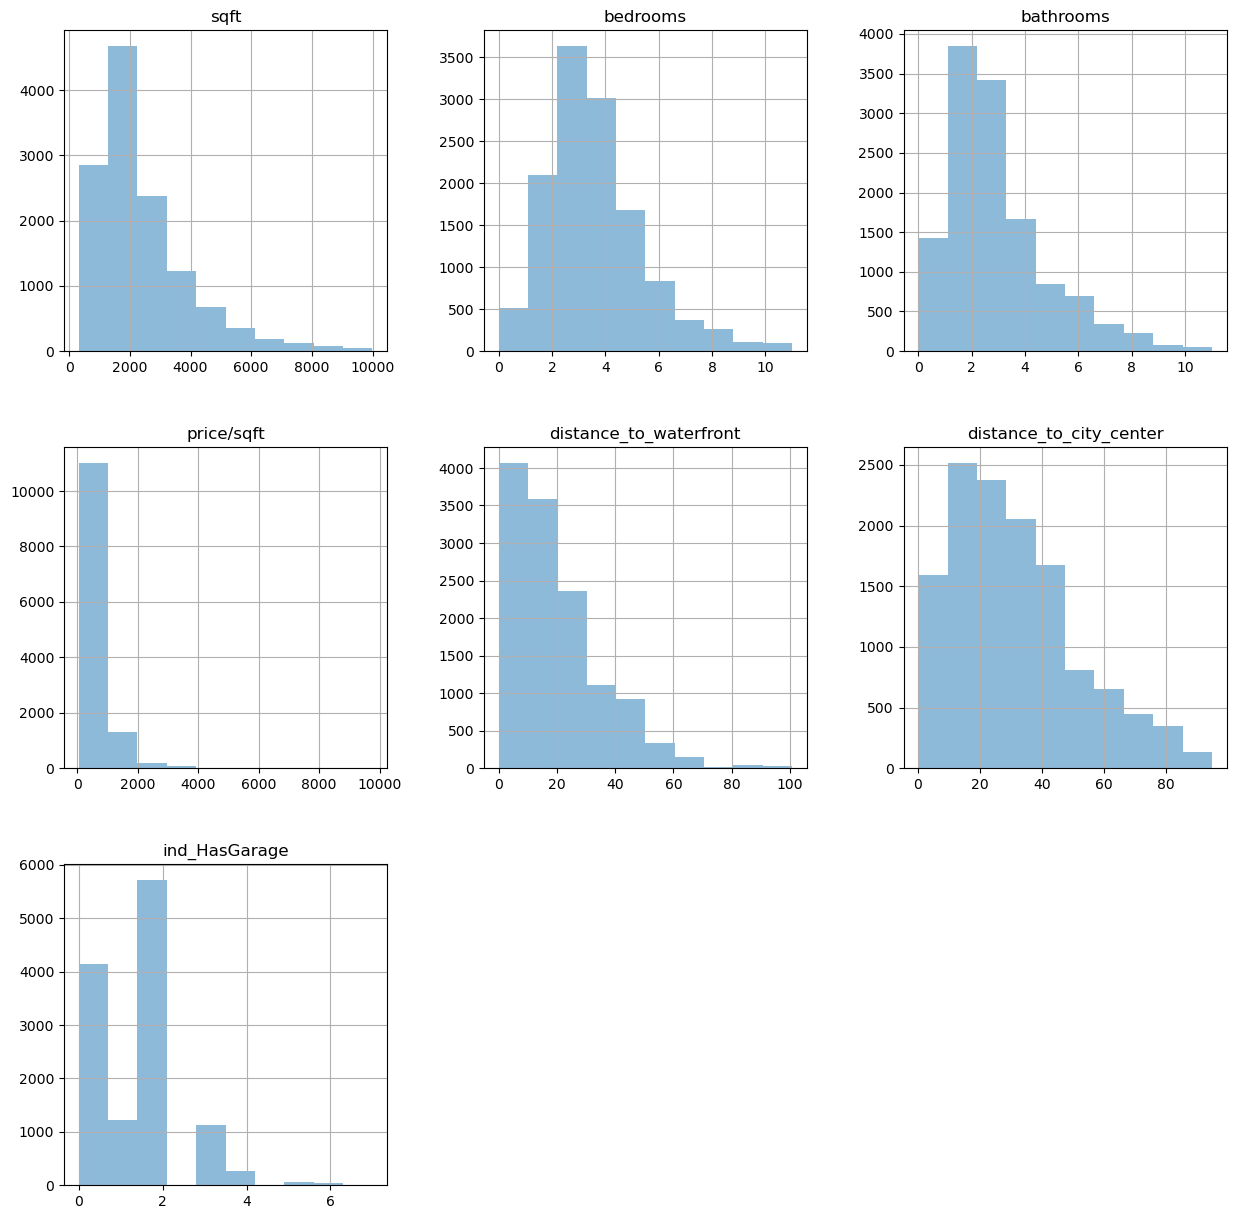

In [9]:
ax_list = df[['sqft','bedrooms','bathrooms','price/sqft','distance_to_waterfront','distance_to_city_center','ind_HasGarage']].hist(bins=10, layout=(3,3), figsize=(15,15), alpha=0.5)

### Additional data cleanup and removing outliers
There are several options to filter outliers.
- Removing the bottom and top 10% of data
- Filter out properties with > 8 garages
- Filter out square footage > 10000 sqft and < 300 sqft
- Filter out number of bedrooms < 1 and > 10
- Filter out number of bathrooms < 1 and > 10
- Filter out listings not in BC and CA

In [10]:
## Removing outliers
from src.data_manipulation.data_cleanup import removeOutliers

df = removeOutliers(df, 'price/sqft') 
df = removeOutliers(df, 'bedrooms')
df = removeOutliers(df, 'bathrooms')
df = removeOutliers(df, 'sqft')
df = removeOutliers(df, 'ind_HasGarage')
df = removeOutliers(df, 'price')

# Additional Filtering
df = df[(df['ind_HasGarage'] < 8 ) & (df['sqft'] < 10000 ) & (df['sqft'] > 300) & (df['bedrooms'].between(1,10) ) & (df['bathrooms'].between(1,10) ) 
        & (df['state'] != 'WA' ) & (df['homeType'] != 'LOT') & (df['homeType'] != 'MANUFACTURED') & (df['homeStatus'] == 'FOR_SALE')]

## check what we have remaining after the initial filters
print(df.groupby('state').size())
print('\n')
## Display the number or properties in USA and CA by home type
print(pd.crosstab(df['homeType'],df['state']))

state
BC    3543
CA    8373
dtype: int64


state            BC    CA
homeType                 
CONDO           687  1256
MULTI_FAMILY    186  1061
SINGLE_FAMILY  2303  5612
TOWNHOUSE       367   444


### Checking for outliers
- Using Violin plot to visualize the distribution of data by home type
- Created split violins to compare the distributions by state (BC and CA)
- Dashed lines represent the quartiles for each group; heavy dashed lines indicate the median

Observations:
- The median price/sqft difference for multi-family homes is more pronounced than other home types
- Median price/sqft in BC and CA are about the same for other home types

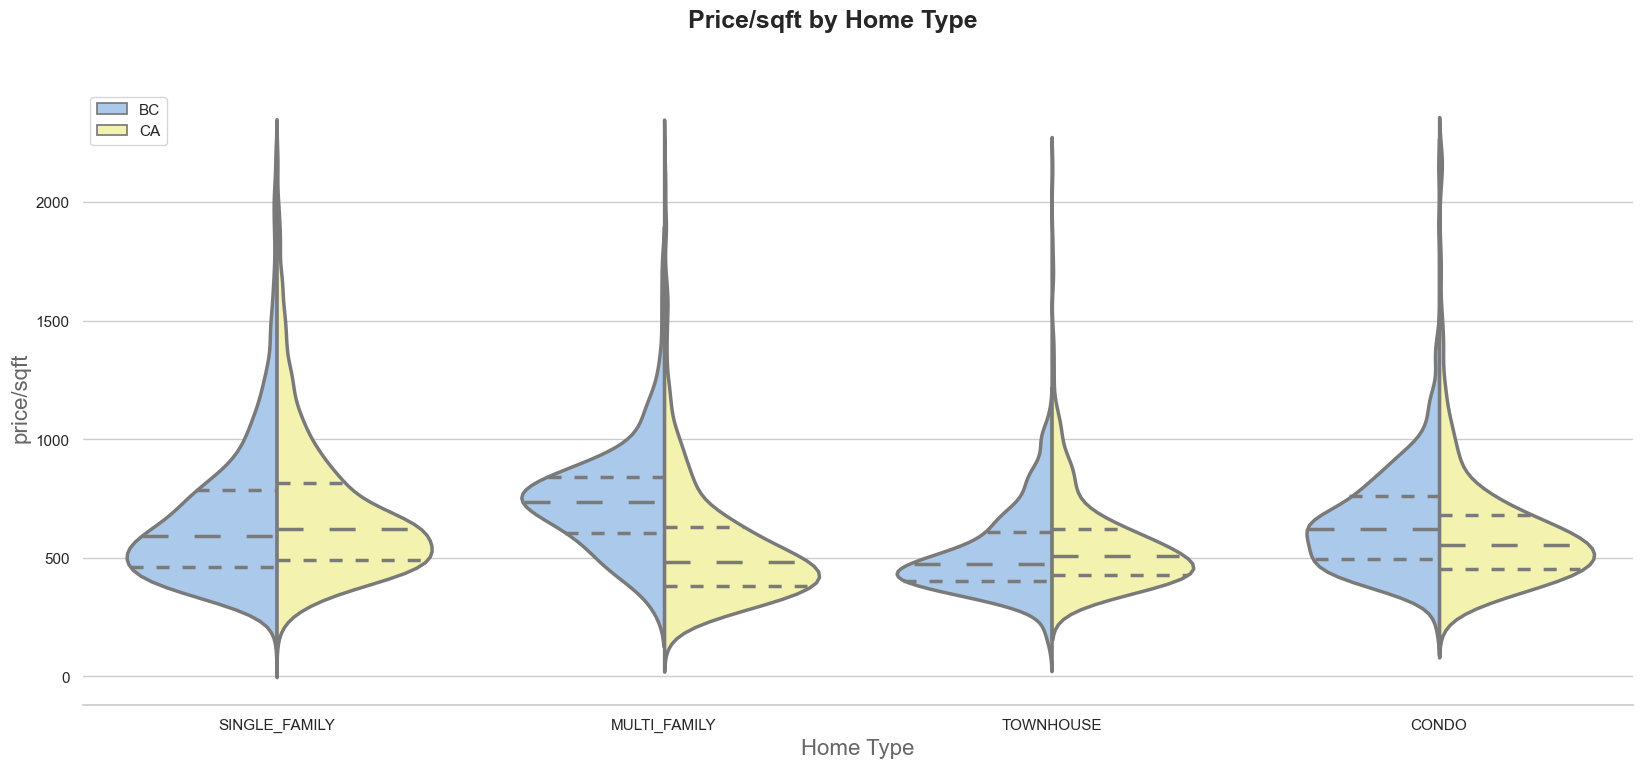

In [11]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(20, 8))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="homeType", y="price/sqft", hue="state", data=df, split=True, linewidth=2.5,
               inner="quart", palette={"BC": "b", "CA": "y"})
sns.despine(left=True)

f.suptitle('Price/sqft by Home Type', fontsize=18, fontweight='bold')
ax.set_xlabel("Home Type",size = 16,alpha=0.7)
ax.set_ylabel("price/sqft",size = 16,alpha=0.7)
plt.legend(loc='upper left')

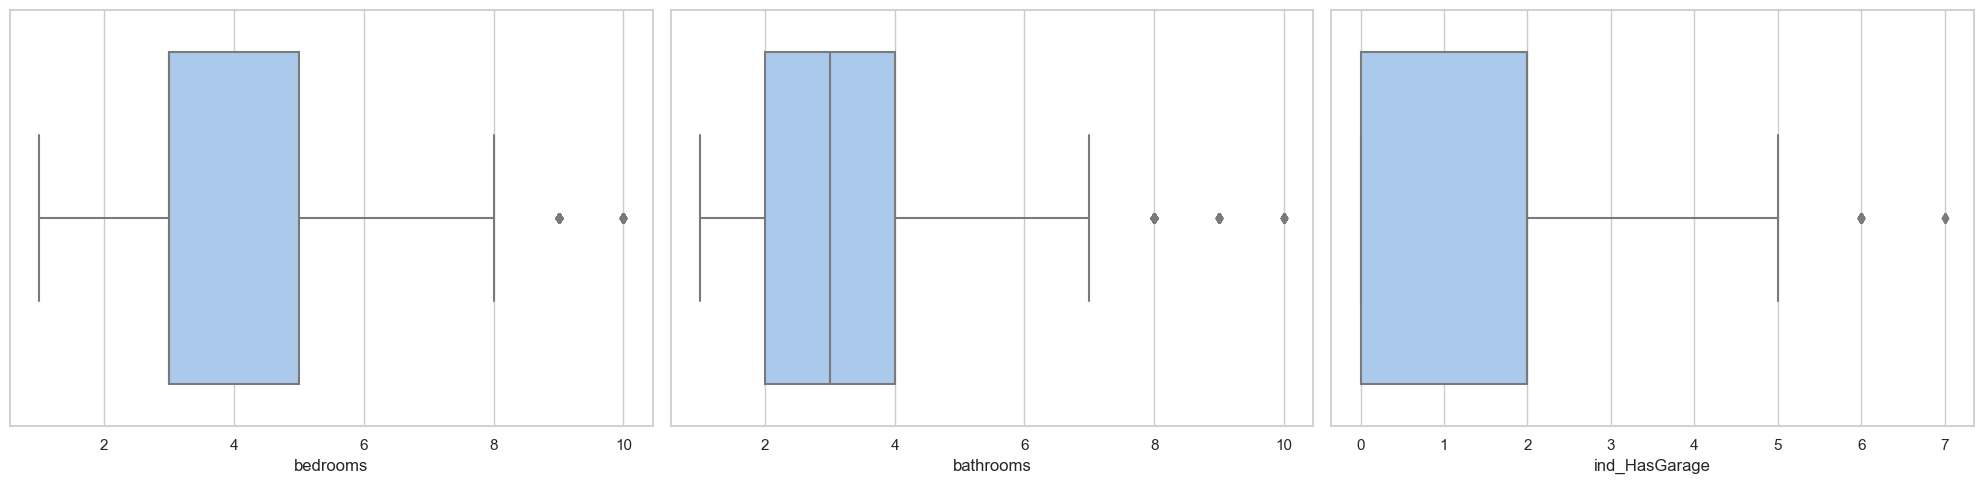

In [12]:
plt.rcParams["figure.figsize"] = [20.00, 5.0]
plt.rcParams["figure.autolayout"] = True
f1, axes1 = plt.subplots(1, 3)

sns.boxplot(x=df.bedrooms, y=None, ax=axes1[0])
sns.boxplot(x=df.bathrooms, ax=axes1[1])
sns.boxplot(x=df['ind_HasGarage'],ax=axes1[2])

plt.show()

# Section 3 - Data Visualization

In [13]:
df_clean = df.copy()
exclude_cols = ['latitude', 'longitude']
numeric_cols = [col for col in df_clean.columns if df_clean[col].dtype.kind in 'biufc']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
print('numeric available columns for pairplot: ', numeric_cols)

numeric available columns for pairplot:  ['price', 'bedrooms', 'bathrooms', 'sqft', 'distance_to_waterfront', 'ind_HasGarage', 'ind_HasPool', 'ind_GolfCourseNearby', 'ind_ShoppingNearby', 'ind_Clubhouse', 'ind_RecreationNearby', 'ind_ParkNearby', 'ind_IsCornerLot', 'ind_IsCuldesac', 'distance_to_city_center', 'price/sqft']


### Pair plot of selected numeric features

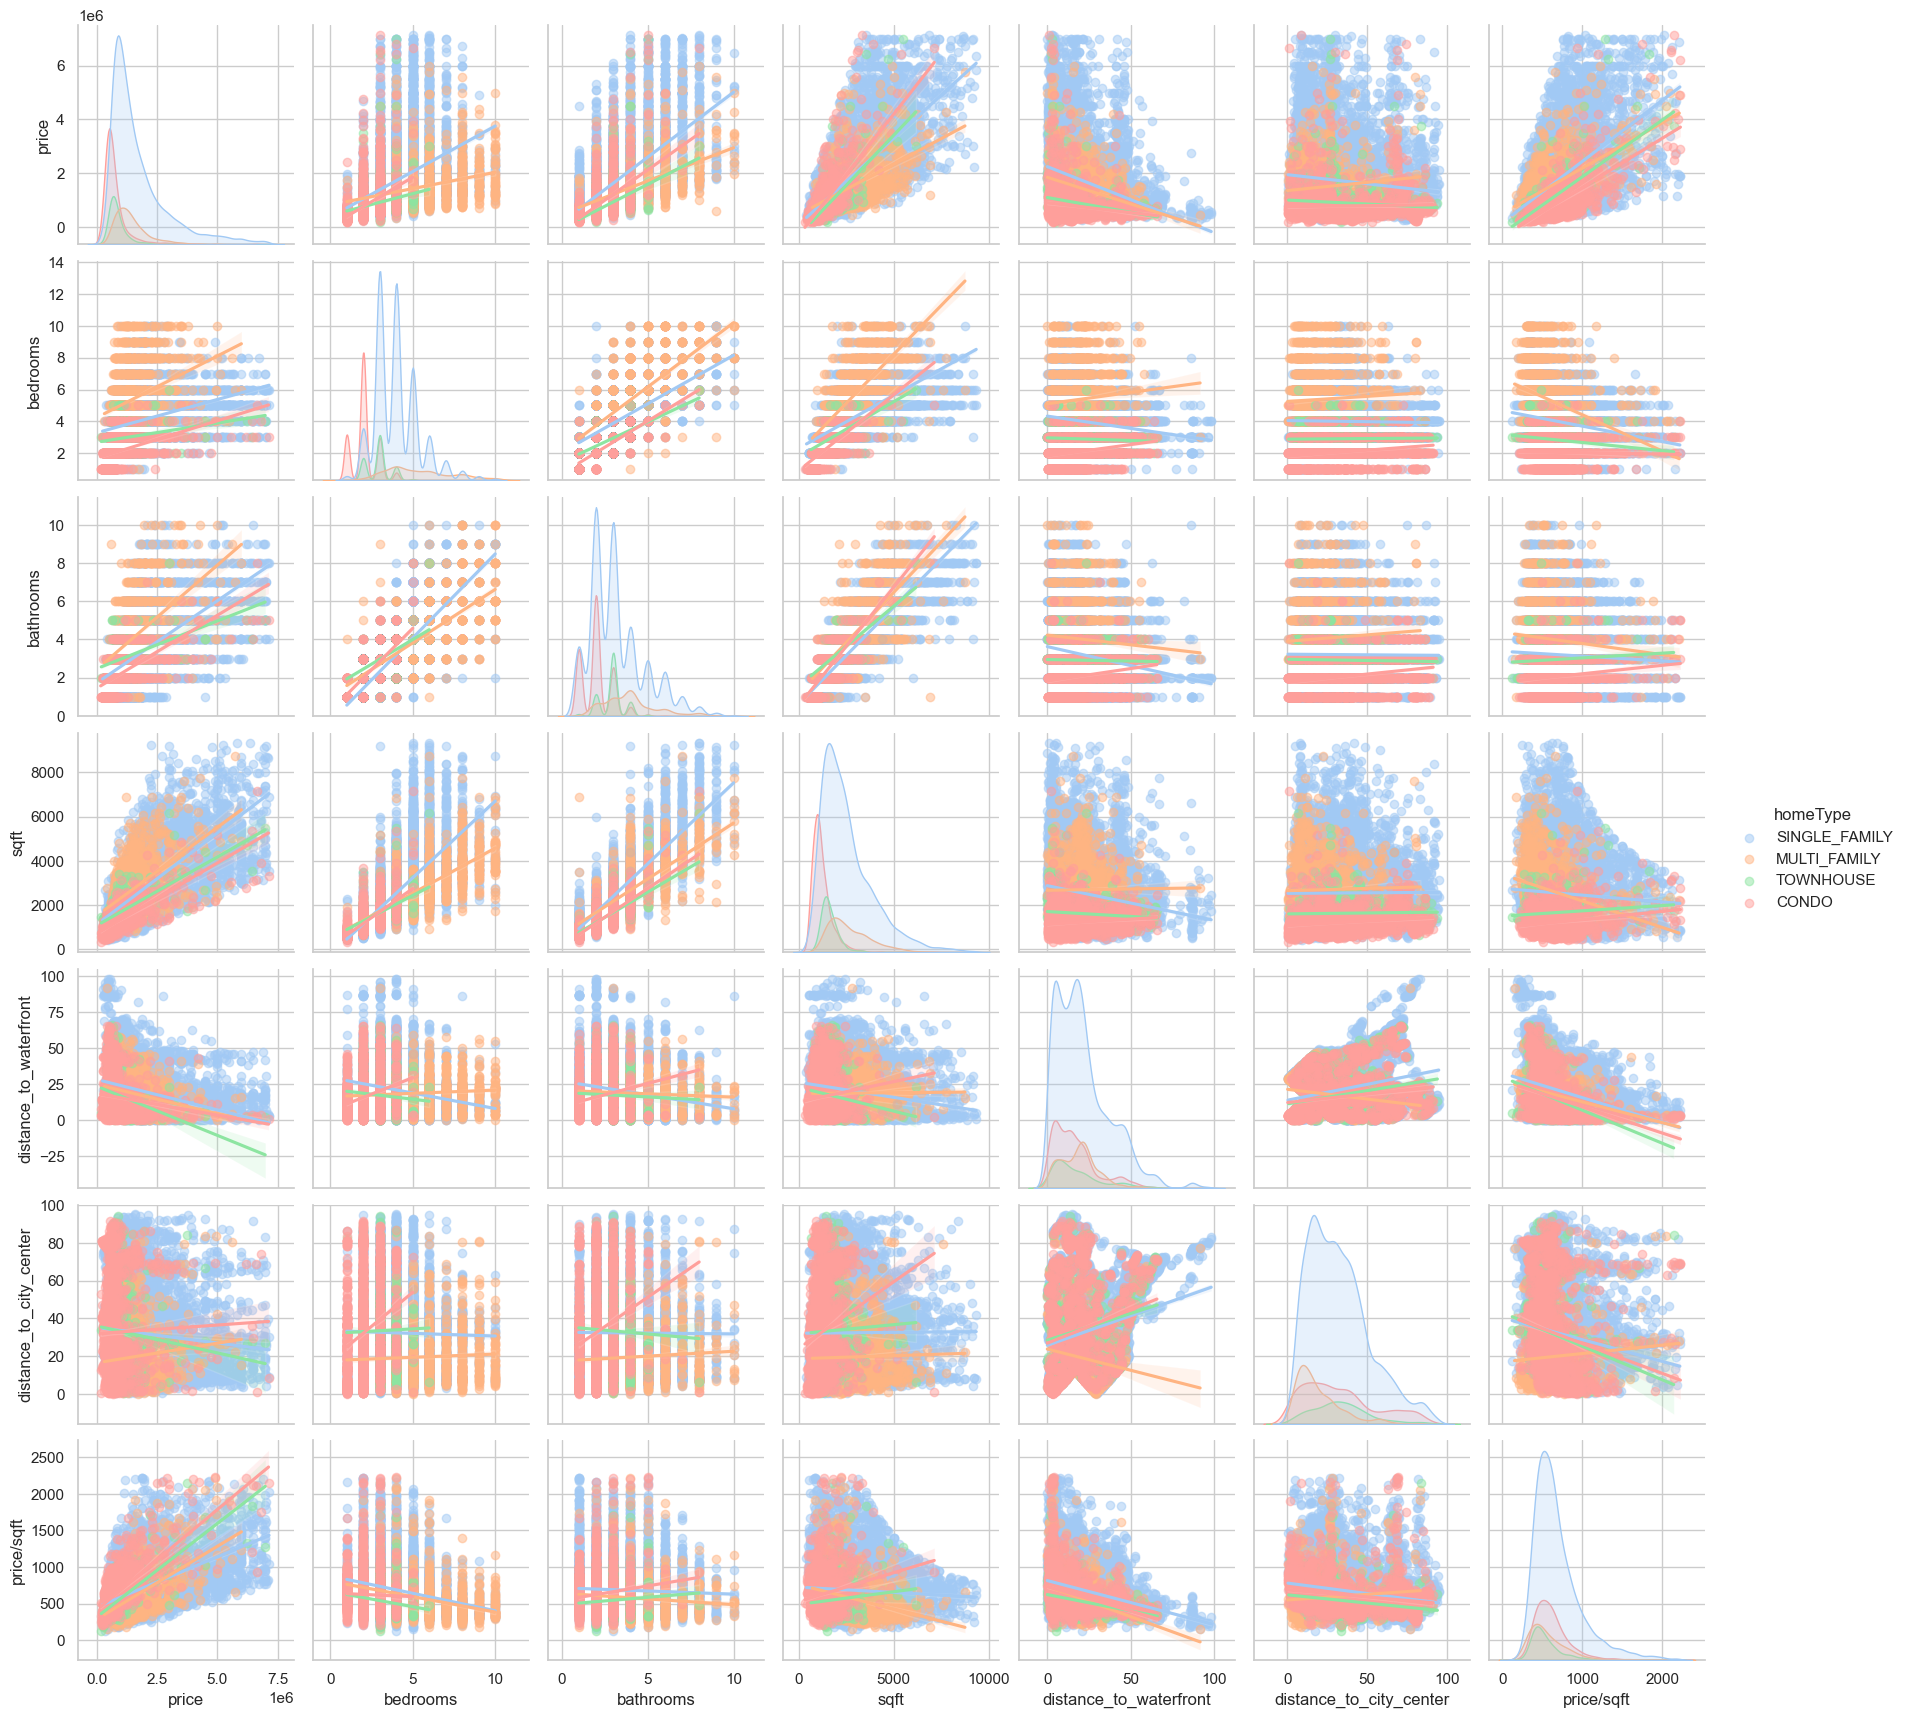

In [14]:
import seaborn as sns

plot_cols = ['price', 'bedrooms', 'bathrooms', 'sqft', 'distance_to_waterfront', 'distance_to_city_center', 'price/sqft']

sns.pairplot(df_clean[plot_cols + ['homeType']], hue='homeType',  kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})

### Pairplot Observations
Starting with the "pairplot" of select numerical features from our dataset, and also coloring them by the type of property, we can make the below observations:
- There are distinct trends between the different property types in certain features, for example sale listing price vs bedrooms , bathrooms or total square footage showed two very different trends between single family and multifamily homes
- Our engineered feature distance to waterfront did not yield an immediately obvious trend against price, although we do see that the properties closer to the waterfront see a drastic increase in price
- Regardless of property type (majority being single family and multi family), the number of bedrooms correlates quite well with the number of bathrooms
- In general it appears the Canadian (specifically Vancouver BC) prices show a steeper trend against all the features compared to the US (specifically Los Angeles CA)

### Distributions of numeric features for each city

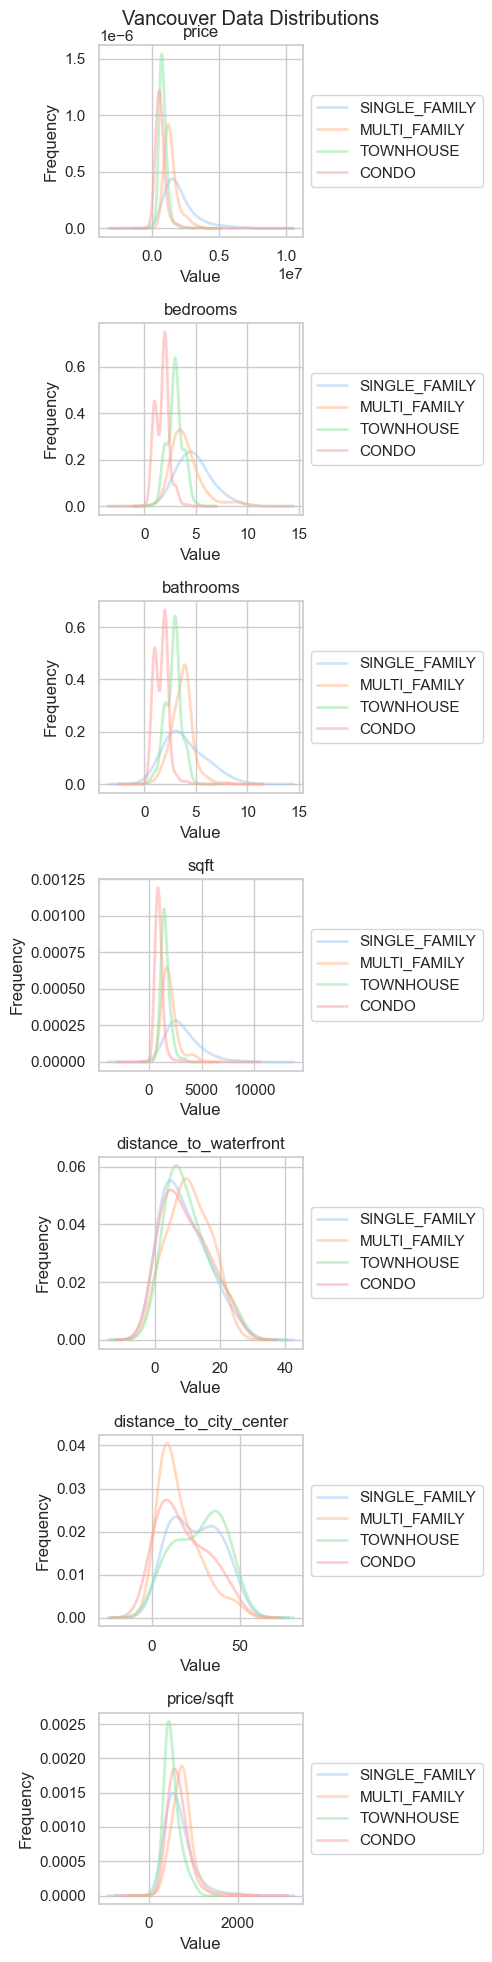

In [15]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=len(plot_cols), ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)
fig.suptitle('Vancouver Data Distributions')
for i, column in enumerate(plot_cols):
    for group in df_clean['homeType'].unique():
        df_clean[(df_clean['homeType'] == group) & (df_clean['query_city']=='Vancouver')][column].plot(kind='kde', ax=axs.ravel()[i], alpha=0.5, label=group, linewidth=2, bw_method=0.5)

    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

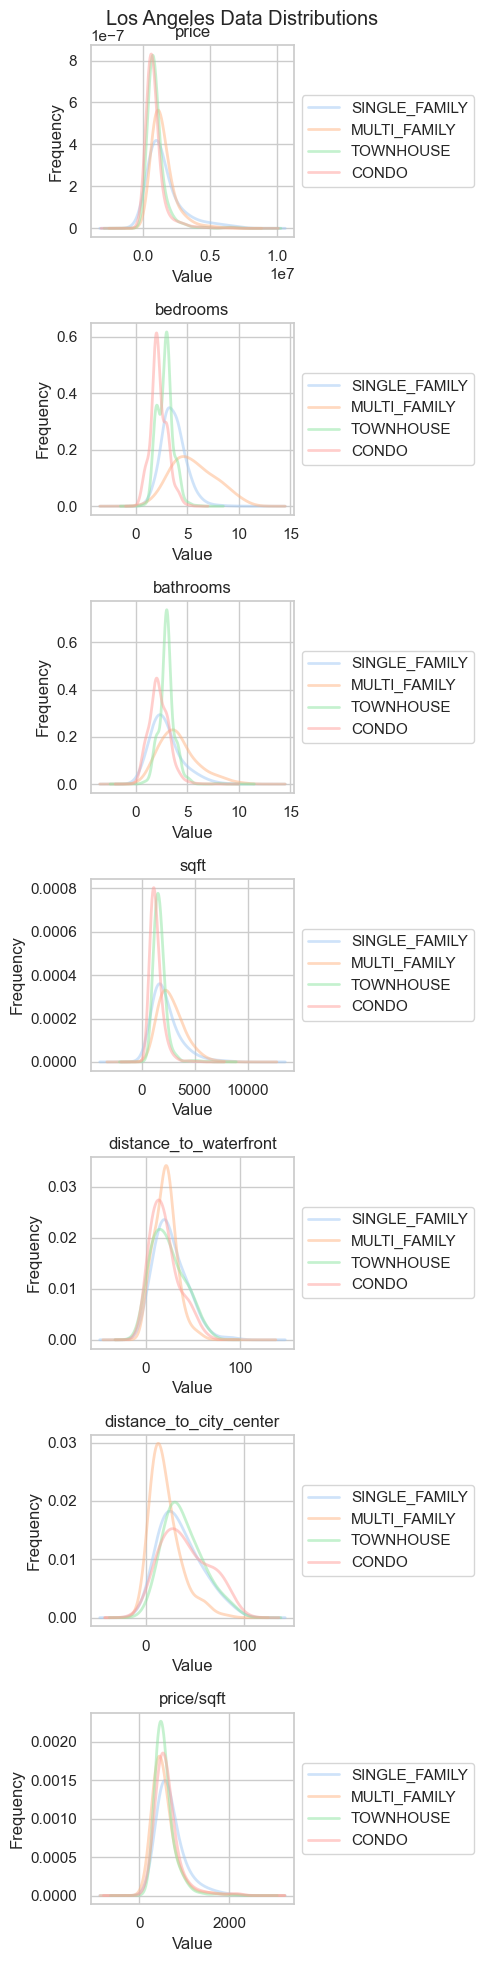

In [16]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=len(plot_cols), ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)
fig.suptitle('Los Angeles Data Distributions')
for i, column in enumerate(plot_cols):
    for group in df_clean['homeType'].unique():
        df_clean[(df_clean['homeType'] == group) & (df_clean['query_city']=='Los Angeles')][column].plot(kind='kde', ax=axs.ravel()[i], alpha=0.5, label=group, linewidth=2, bw_method=0.5)

    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

### Comparing the distribution of numeric features between the two cities

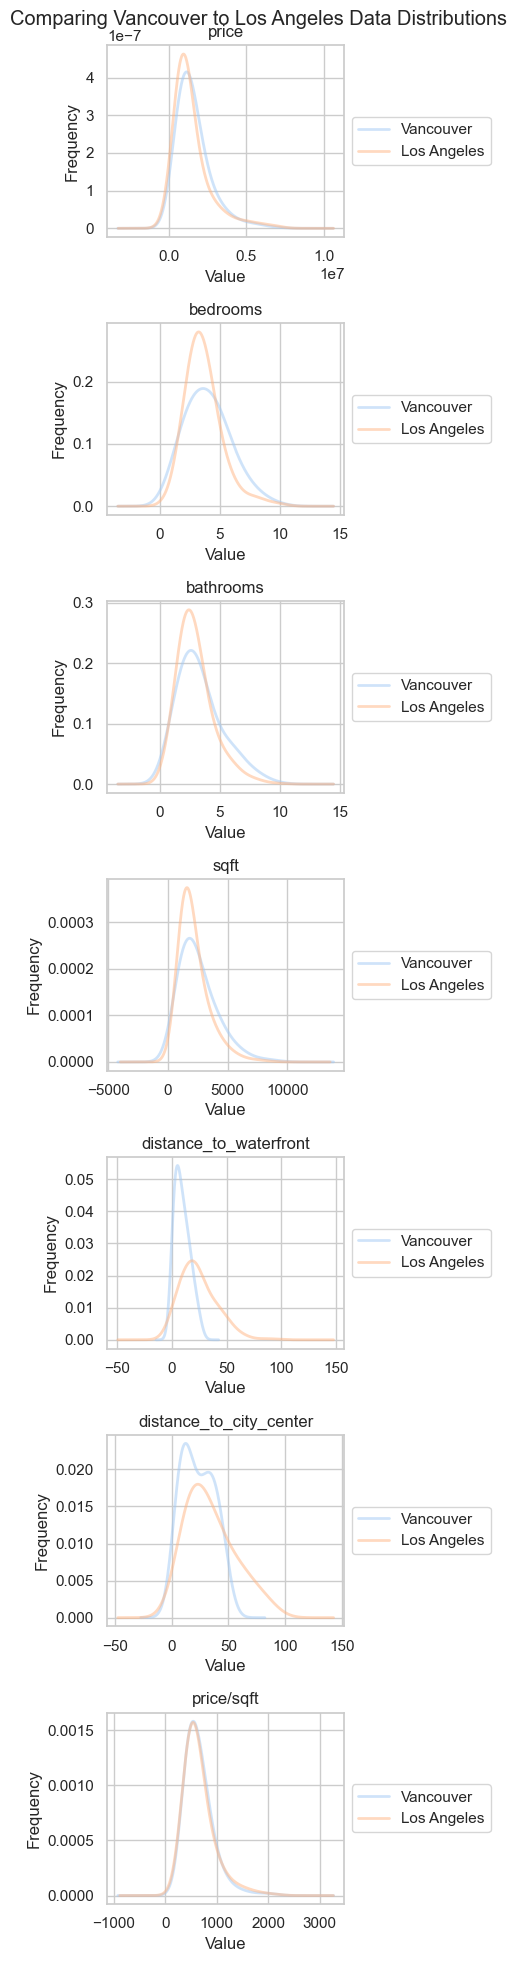

In [18]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(nrows=len(plot_cols), ncols=1, figsize=(5,20))
fig.subplots_adjust(hspace=1)
fig.suptitle('Comparing Vancouver to Los Angeles Data Distributions')
for i, column in enumerate(plot_cols):
    for group in df_clean['query_city'].unique():
        df_clean[(df_clean['query_city'] == group)][column].plot(kind='kde', ax=axs.ravel()[i], alpha=0.5, label=group, linewidth=2, bw_method=0.5)

    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

### Observations
- It is quite interesting that the distribution of price/sqft is nearly identical between Vancouver and LA
- Vancouver's single family houses have the most bedrooms/bathrooms while LA's multi family houses have the most bedrooms, this might be due to zoning definitions between the two cities, the same phenomeon is seen on total property square footage
- The distributions for distance to waterfront appear to all be quite similar, meaning there's a relatively even mix of different property types along the coast line.
- The distributions for distance to city center shows that multi family homes are most abundant closest to the downtown center of each city
- The price/sqft generally doesn't seem to differ too much between property types in both cities

## Heat Map visualization of Price and Price/Sqft

In [19]:
import folium
from folium.plugins import HeatMap
# create coastline dictionary 

coastline = {'BC': [
    (49.4179, -123.2336),
    (49.3322, -123.2652),
    (49.3223, -123.1416),
    (49.2758, -123.1485),
    (49.2758, -123.2639),
    (49.2194, -123.2185),
    (49.0820, -123.1842),
    (49.0327, -123.1073),
    (48.9678, -123.0826),
    (48.9714, -123.0125),
    (49.0435, -123.0414),
    (49.0866, -122.8725),
    (49.0273, -122.8807),
    (49.0021, -122.7755)
],
            'CA':[
    (34.0032, -118.8062),
    (34.0078, -118.5095),
    (33.8005, -118.3914),
    (33.7617, -118.4079),
    (33.6978, -118.2843),
    (33.7457, -118.1140),
    (33.5904, -117.9135),
    (33.2077, -117.3917)
]
}

city_centers = {
    'BC':(49.282 , -123.1171),
    'CA':(34.088, -118.2518),
}


# create initial map layers for the two cities
vancouver_heatmap = folium.Map(location=[49.2497, -123.1193], zoom_start=10)
LA_heatmap = folium.Map(location=[33.7617, -118.4079], zoom_start=9)

gradient = {0.2: 'green', 0.4: 'blue', 0.6: 'yellow', 1: 'red'}

# create a function that generates the heatmap, and plots it out
def show_heatmap(state, map_column, map_base):
    
    init_map = folium.Map(location=map_base.location, zoom_start=10)
    
    folium.PolyLine(coastline[state], color="red", weight=2.5, opacity=1).add_to(init_map)
    df_filter = df_clean[df_clean['state']==state]
    max_val = df_filter[map_column].max()
    min_val = df_filter[map_column].min()
    q20_val = df_filter[map_column].quantile(0.2)
    q80_val = df_filter[map_column].quantile(0.8)
    
    data_price_locations = df_filter[['latitude', 'longitude', map_column]].values.tolist()
    city = 'Vancouver, BC' if state == 'BC' else 'Los Angeles, CA'
    heatmap_layer = HeatMap(data_price_locations, 
                            name=f'{city} Price/Sqft', 
                            min_opacity=0.1, 
                            radius=20,
                           min_val =q20_val,
                           max_val = q80_val,

                           )
    heatmap_layer.add_to(init_map)
    folium.LayerControl().add_to(init_map)
    folium.Marker(location=[city_centers[state][0], city_centers[state][1]], icon=folium.Icon(icon='star')).add_to(init_map)
    
    return init_map



In [20]:
display(show_heatmap('BC', 'price', vancouver_heatmap))
display(show_heatmap('CA', 'price', LA_heatmap))

C:\Users\JZ2018\AppData\Local\Temp\ipykernel_1268\1644519603.py:59: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


C:\Users\JZ2018\AppData\Local\Temp\ipykernel_1268\1644519603.py:59: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


In [21]:
display(show_heatmap('BC', 'price/sqft', vancouver_heatmap))
display(show_heatmap('CA', 'price/sqft', LA_heatmap))

C:\Users\JZ2018\AppData\Local\Temp\ipykernel_1268\1644519603.py:59: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


C:\Users\JZ2018\AppData\Local\Temp\ipykernel_1268\1644519603.py:59: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data_price_locations,


### Heat Map Observations
While it is interesting that the higher value (both price and price/sqft) listings generally tend to not be very far from the waterfront, it can be seen that the trend is much more apparent in Vancouver, BC compared to Los Angeles, CA. 

In Vancouver almost all properties in communities that have are along the coastline appear to be higher priced. However in Los Angeles we only see a couple of communities along the coastline that are very high priced with the other areas along the coastline generally in the same price range as the rest of the city.

On the other hand, the highest priced properties appear to be close to downtown center whereas Vancouver has pockets of high price properties near the coast line but away from the city center, it's possible the proximity to the US/Canada border may also play a role for some of these properties in Vancouver.

# Section 4 - Analysis Insights and Conclusions

In [22]:
#pd.set_option('display.max_columns', None)
df_clean[df_clean['state'].isin(['BC','CA'])].groupby('state')[['price','price/sqft','sqft']].agg(['mean', 'median', 'min', 'max'])

price                                   price/sqft              \
               mean      median       min        max        mean      median   
state                                                                          
BC     1.582024e+06  1312499.25  161250.0  7125000.0  653.117585  593.112245   
CA     1.441763e+06   995000.00  185000.0  7149000.0  657.960009  583.868613   

                                       sqft                         
              min          max         mean  median    min     max  
state                                                               
BC     125.000000  2220.675355  2534.594976  2203.0  317.0  9347.0  
CA     152.169689  2227.272727  2167.427326  1800.0  400.0  9180.0

This table shows summary statistics for the price, price/sqft and sqft data in each State (each city), with BC as Vancouver and CA as Los Angeles.

Overall although the mean price is relatively similar but Vancouver appears to have a much higher median price at <font color='red'>~1.31M</font> compared to LA at <font color='red'>1.00M</font>. 

The difference decreases substantially when comparing price per square feet, where the difference is ~4 USD/sqft, or a 1\% difference in the mean price/sqft between the two cities and ~10 USD/sqft or almost 2\% difference in the median price/sqft. 

Here we also see that the higher median prices in Vancouver appears to be driven by larger square footages (~12\% higher sqft on median comparisons). 

### Which features impact real estate prices?
- Buyers tend to look for properties with access to activities that apply to their interest.
- Access to facilities were added as new columns to the data
- Determine if there is a difference in home prices based on the availability of certain features. 
- We focused on the following features: access to a golf course, shopping, recreational facility or park, and lot location (i.e. corner lot)

In [23]:
features = ['ind_GolfCourseNearby','ind_ShoppingNearby','ind_Clubhouse','ind_RecreationNearby','ind_ParkNearby','ind_IsCornerLot','ind_IsCuldesac']
labels = ['Golf Course','Shopping Stores','Clubhouse','Recreation','Park','Corner Lot','Cul-de-sac']
df2 = pd.DataFrame(columns = ['Feature','Yes','No'])
i=0
for item in features:
    df2.loc[i] = [labels[i],df.loc[df[item]==True,'price/sqft'].mean(),df.loc[df[item]==False,'price/sqft'].mean()]
    i+=1
df2['Diff%'] = (df2.Yes-df2.No)/df2.No*100
df2[['Yes','No','Diff%']] = df2[['Yes','No','Diff%']].round(decimals=0)
df2


Feature    Yes     No  Diff%
0      Golf Course  639.0  657.0   -3.0
1  Shopping Stores  646.0  659.0   -2.0
2        Clubhouse  572.0  657.0  -13.0
3       Recreation  642.0  659.0   -3.0
4             Park  654.0  657.0   -0.0
5       Corner Lot  645.0  657.0   -2.0
6       Cul-de-sac  606.0  661.0   -8.0

[Text(0.5, 1.0, 'Average price/sqft by Feature')]

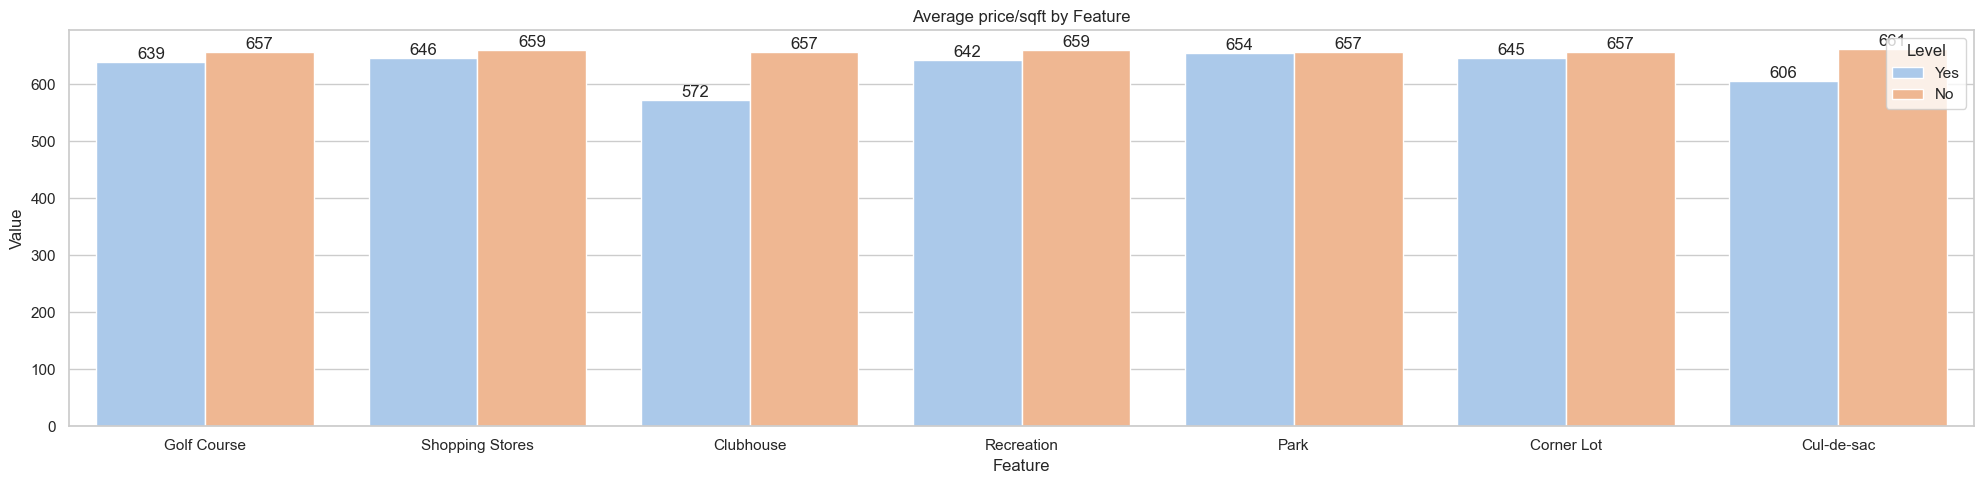

In [24]:
## Displaying same data in a chart

df3 = df2[['Feature','Yes','No']]
df3.set_index('Feature', inplace=True)
df3 = df3.stack().to_frame('Value').reset_index()
df3.rename(columns={'level_1':'Level'},inplace=True)

ax = sns.barplot(x='Feature', y='Value',hue = 'Level',data=df3,errwidth=0)
for i in ax.containers: ax.bar_label(i,)      
ax.set(title="Average price/sqft by Feature")

### Observations:
- Access to a golf course, shopping stores and recreational facilities does not have significant impact to home prices.
- Surpringly, cul-de-sac listings appear to be less expensive compared to interior lots; this could be caused by small number of listings collected with that feature.

### Aggregating the engineered features for distance to waterfront and distance to city center

In [40]:
df['waterfront_lessthan_2km'] = np.where(df['distance_to_waterfront'] <= 2, 1, 0)
df['waterfront_morethan_2km'] = np.where(df['distance_to_waterfront'] > 2, 1, 0)
df['citycenter_lessthan_2km'] = np.where(df['distance_to_city_center'] <= 2, 1, 0)
df['citycenter_morethan_2km'] = np.where(df['distance_to_city_center'] > 2, 1, 0)

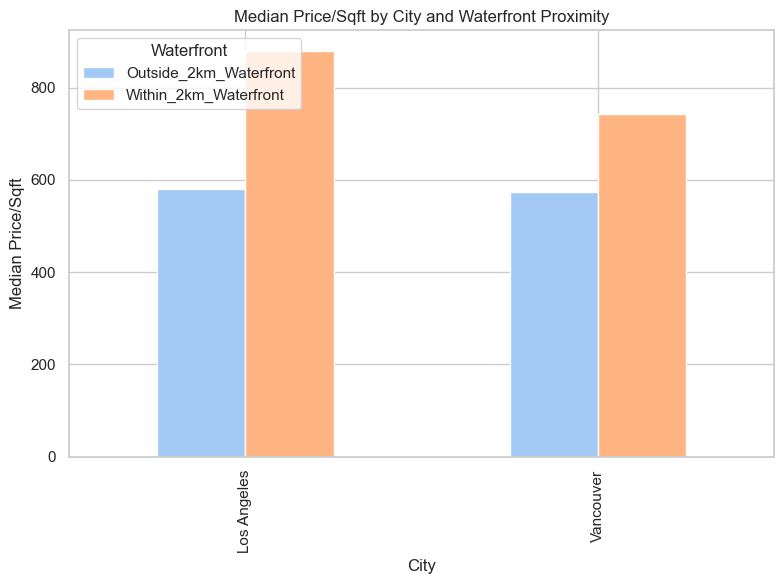

In [41]:
grouped = df.groupby(["query_city", "waterfront_lessthan_2km", "waterfront_morethan_2km"])["price/sqft"].median().reset_index()
grouped["waterfront"] = grouped.apply(lambda row: "Within_2km_Waterfront" if row["waterfront_lessthan_2km"] == 1 else "Outside_2km_Waterfront", axis=1)

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
grouped.pivot(index="query_city", columns="waterfront")["price/sqft"].plot(kind="bar", ax=ax)
plt.legend(title="Waterfront", loc="upper left")
plt.xlabel("City")
plt.ylabel("Median Price/Sqft")
plt.title("Median Price/Sqft by City and Waterfront Proximity")
plt.show()


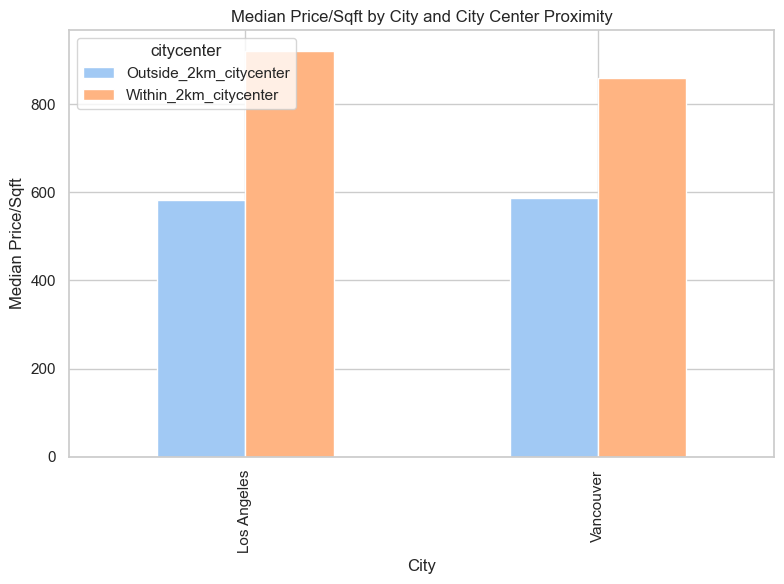

In [42]:
grouped = df.groupby(["query_city", "citycenter_lessthan_2km", "citycenter_morethan_2km"])["price/sqft"].median().reset_index()
grouped["citycenter"] = grouped.apply(lambda row: "Within_2km_citycenter" if row["citycenter_lessthan_2km"] == 1 else "Outside_2km_citycenter", axis=1)

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
grouped.pivot(index="query_city", columns="citycenter")["price/sqft"].plot(kind="bar", ax=ax)
plt.legend(title="citycenter", loc="upper left")
plt.xlabel("City")
plt.ylabel("Median Price/Sqft")
plt.title("Median Price/Sqft by City and City Center Proximity")
plt.show()

Observations
- As expected, we see that properties within 2km of the coastline in both cities have a significant markup compared to properties away from the coastline
- Also, the same thing is observed on the proximity to the downtown city center, where properties closer to the downtown center see a significant increase
- However, as shown on the heat map visualizations, both city's downtown center appear to be within a relatively close proximity to the waterfront thus resulting in multi-collinearity between these two features

## Conclusions

The main observations are as follows:
- The median price/sqft difference for multi-family homes is more pronounced than other home types. Additionally, single family and multi-family homes show distinct trends in features such as sale listing price vs bedrooms, bathrooms, and total square footage.
- Canadian prices show a steeper trend against all features compared to the US. This is particularly noticeable in Vancouver, BC, where almost all properties in coastal communities are higher priced.
- Vancouver has a higher median price at \~1.31M compared to LA at 1.00M. The difference decreases substantially when comparing price per square feet, where the higher median prices in Vancouver appear to be driven by larger square footages (~12% higher sqft on median comparisons).
- Proximity to the coastline and downtown center significantly impacts home prices in both cities. Properties within 2km of the coastline and closer to the downtown center see a significant increase in price.
- Surprisingly, cul-de-sac listings appear to be less expensive compared to interior lots. Additionally, access to a golf course, shopping stores, and recreational facilities does not have a significant impact on home prices.

In conclusion, our study shows that both distance to waterfront and distance to city center have a significant influence on sale listing prices for properties in both Vancouver, BC and Los Angeles, CA. However, due to the proximity of the downtown center to the waterfront in both cities, there appears to be multi-collinearity between these two features. We also observed that multi-family homes have a more pronounced median price/sqft difference compared to other home types, and that there are distinct trends between the different property types in certain features such as bedrooms, bathrooms, and total square footage. Additionally, our analysis shows that the Canadian housing market, specifically Vancouver, has a steeper trend against all features compared to the US, and almost all properties in coastal communities are higher priced. Despite these differences, the impact of standard features such as square footage, number of bedrooms, and number of bathrooms on sale listing prices appears to be similar between the two markets.